# Image Feed Exploration

Exploring methods to capture images using a laptop webcam to facilitate the facial
verification to be eventually carried out with the model.

As the model being developed is meant to perform facial verification / recognition, we
need to make sure the input images for inference to be of a similar type / shape to the
training data to make full use of the model.

In [1]:
import cv2
import matplotlib.pyplot as plt

In [27]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    # frame = frame[120:120+250,200:200+250, :]
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()


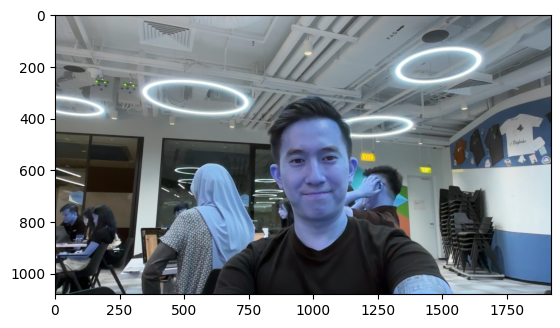

In [28]:
plt.imshow(frame)

The frame above shows the last frame from the feed of my laptop's webcam (in Google
Singapore's Developer Space for an event) before I
pressed the 'Q' key on my keyboard. When the app is implemented in the future, it
probably isn't going to be identical in usage, but the main gist of the function will be
similar to this where an image is captured and sent into the model.

Before moving on, let's check what the size of the image is. Remember that the images
from the LFW dataset that we are going to use to train the model is of size `250 x 250`

Side note: The image looks weirdly colored because OpenCV (which I used to capture the
image) orders their colour channels in a BGR order while Matplotlib (which I used to
show the image) orders it in RGB.

#### Checking Size of Captured Image

In [29]:
frame.shape

(1080, 1920, 3)

So right away we can see that my laptop's webcam has a much higher resolution,
`1080x1920` vs `250x250`. We can also see that the image has 3 channels, thankfully.

We'll have to address the resolution, as the model will expect a `250x250`. Let's try
to slice the image to a point where it shows my face in a `250x250` square

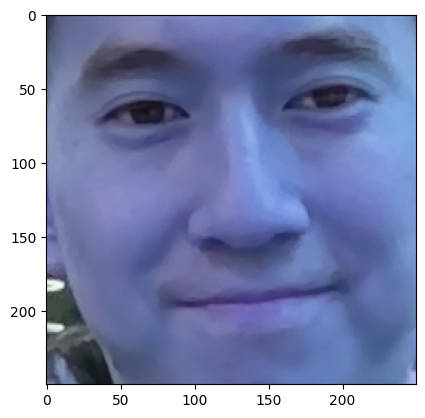

In [35]:
y_axis = 500
x_axis = 870
sliced_image = frame[y_axis:y_axis+250,x_axis:x_axis+250, :]
plt.imshow(sliced_image)

We've successfully framed my face in a `250x250` square, albeit a bit zoomed in. That's
fine for now.

# Conclusion:

* Found a way to capture images to feed into the Facial Verification Model
* Found a way to slice images to a `250x250` size to be fed into the model as inputs,
  avoiding matrix size issues